<a href="https://colab.research.google.com/github/avicennamumtaza/courses-computervision/blob/main/module10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


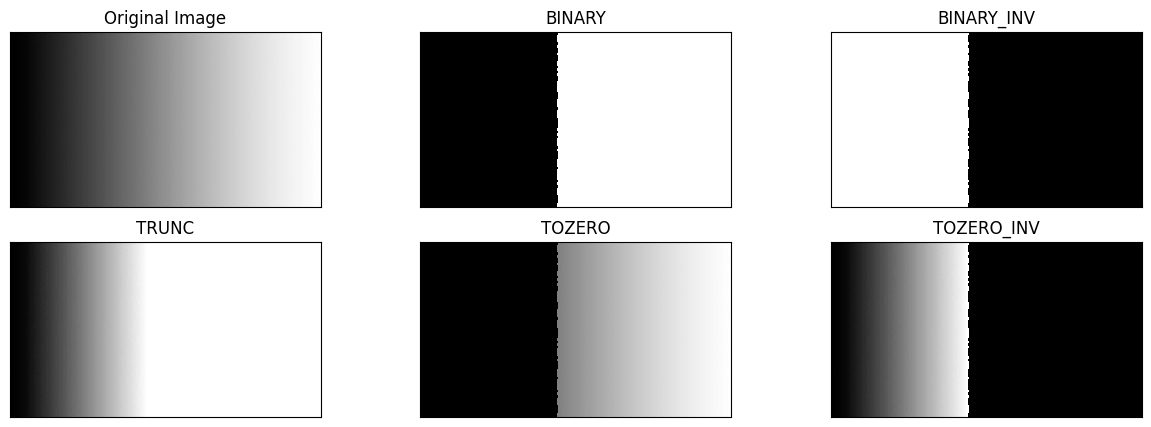

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale mode for thresholding
filename = '/content/drive/MyDrive/PCVK/gradient.jpg'
img = cv.imread(filename, cv.IMREAD_GRAYSCALE)  # Read the image as grayscale
thresh = 127      # Nilai Threshold yang ditentukan

# 1. BINARY threshold
ret, thresh1 = cv.threshold(img, thresh, 255, cv.THRESH_BINARY)
# 2. BINARY inverse threshold
ret, thresh2 = cv.threshold(img, thresh, 255, cv.THRESH_BINARY_INV)
# 3. Truncate threshold
ret, thresh3 = cv.threshold(img, thresh, 255, cv.THRESH_TRUNC)
# 4. Tozero threshold
ret, thresh4 = cv.threshold(img, thresh, 255, cv.THRESH_TOZERO)
# 5. Tozero inverse threshold
ret, thresh5 = cv.threshold(img, thresh, 255, cv.THRESH_TOZERO_INV)

# Titles and images list
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

# Convert all images to uint8 type
images = [image.astype(np.uint8) for image in images]

# Displaying the images using Matplotlib
plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray', interpolation='nearest')  # Use 'gray' colormap for all images
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])  # Remove axis ticks
plt.show()

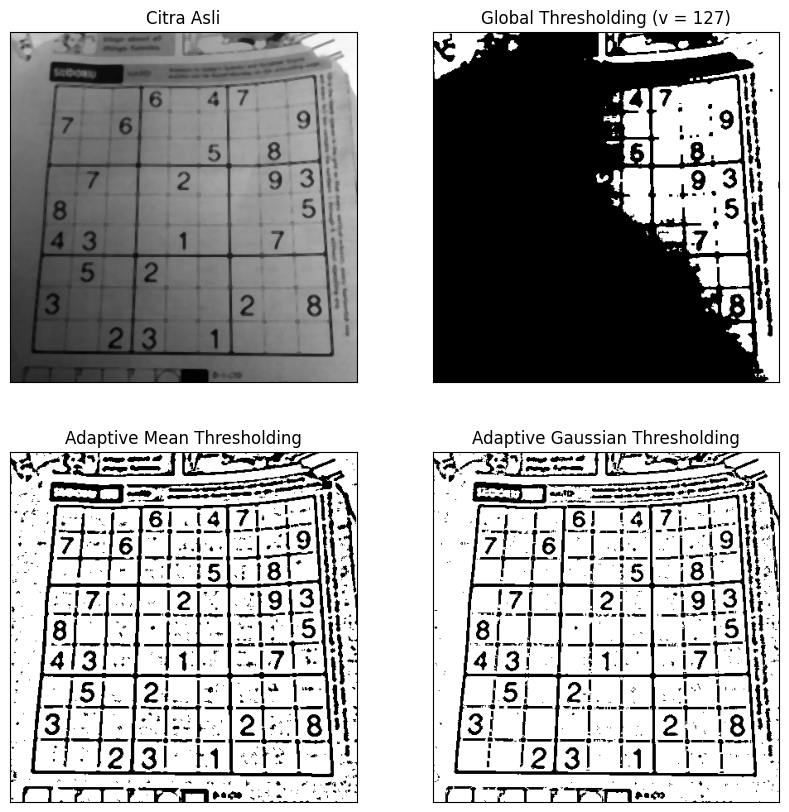

In [17]:
filename = ('/content/drive/MyDrive/PCVK/sudoku-original.jpg')
citra = cv.medianBlur(cv.imread(filename),5)
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)
#gray = cv.medianBlur(gray,5)

thresh = 127

ret,th1 = cv.threshold(gray,thresh,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv
 .THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C
 , cv.THRESH_BINARY,11,2)

titles = ['Citra Asli', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
citra2 = [gray, th1, th2, th3]

plt.figure(figsize = (10,10))
for i in range(len(citra2)):
    plt.subplot(2,2,i+1),plt.imshow(citra2[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

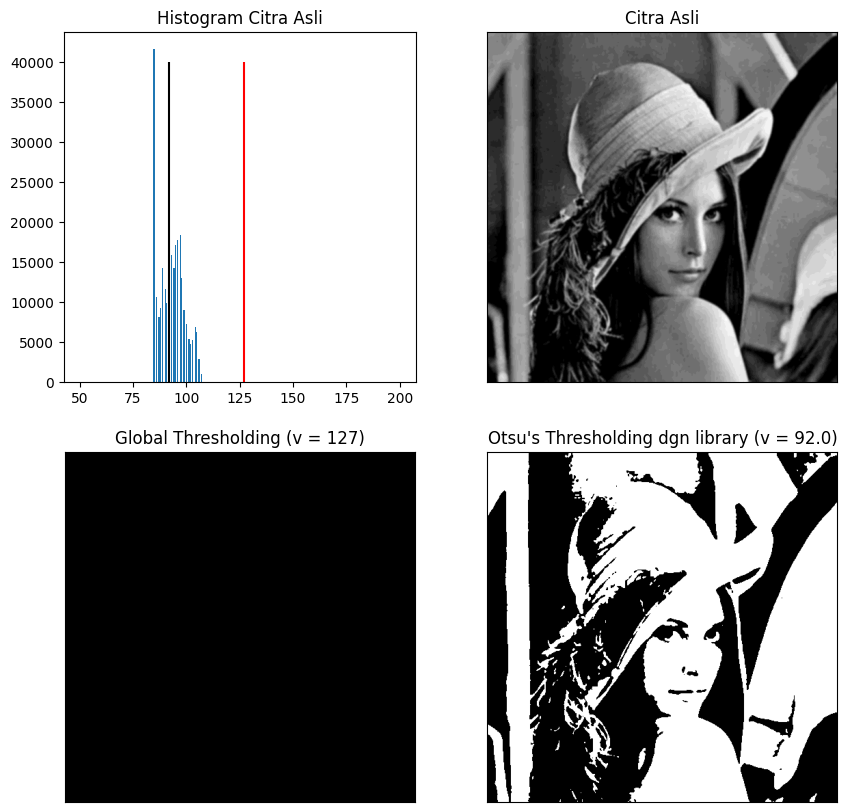

In [18]:
# Dengan Library
filename = ('/content/drive/MyDrive//PCVK/lena_gs_lc2.jpg')
img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)
thresh = 127

ret,th1 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])
plt.vlines(ret,0,40000,colors='red')     #garis vertikal merah menunjukan threshold global 127
plt.vlines(ret2,0,40000,colors='black')  #garis vertikal hitam menunjukkan threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')
for i in range(len(citra3)):
    plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

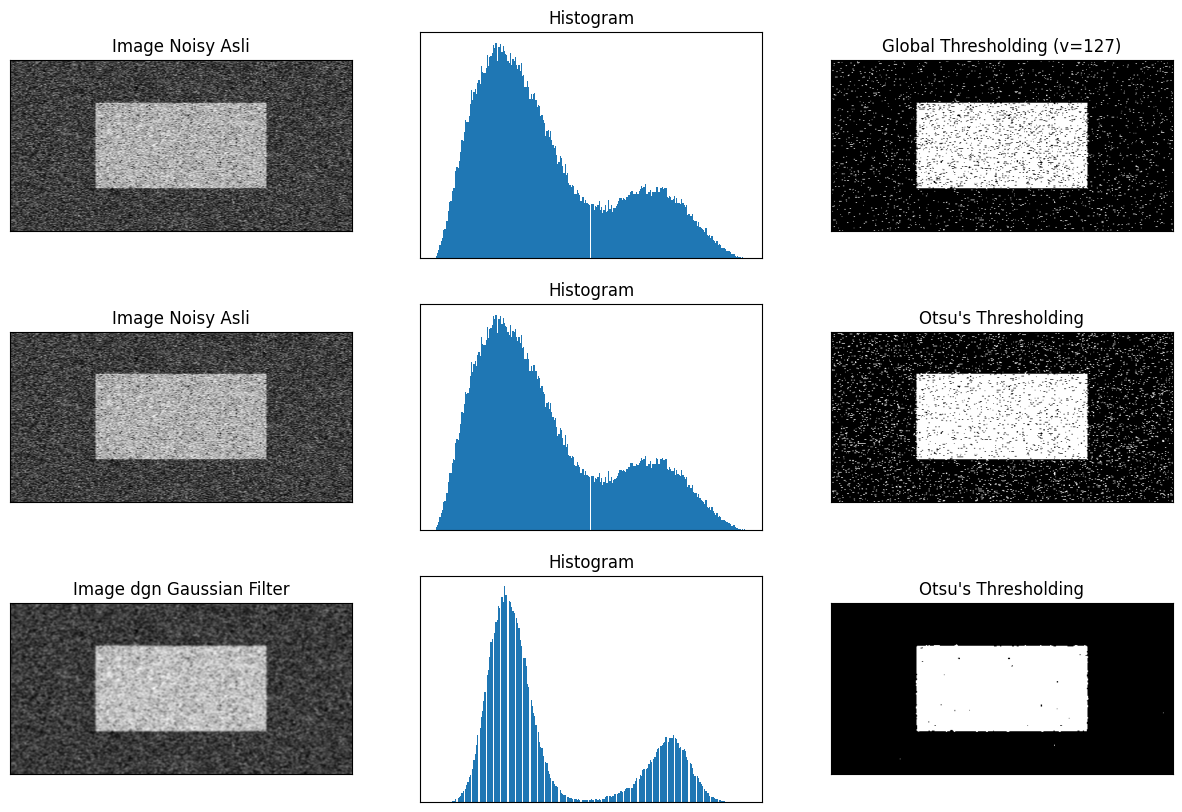

In [19]:
from google.colab.patches import cv2_imshow

filename = ('/content/drive/MyDrive/PCVK/noisy2.png')
img = cv.imread(filename, 0)

#Global Thresholding
ret1, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)
# Otsu's thresholding
ret2, th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding setelah dilakukan Gaussian filtering
blur = cv.GaussianBlur(img, (5,5), 0)
ret3, th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

#plotting semua image
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Image Noisy Asli', 'Histogram', 'Global Thresholding (v=127)',
          'Image Noisy Asli', 'Histogram', "Otsu's Thresholding",
          'Image dgn Gaussian Filter', 'Histogram', "Otsu's Thresholding"]
plt.figure(figsize = (15,10))

# cv2_imshow(images[0].ravel)

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

(<Axes: >, <matplotlib.image.AxesImage at 0x796415a1a380>)

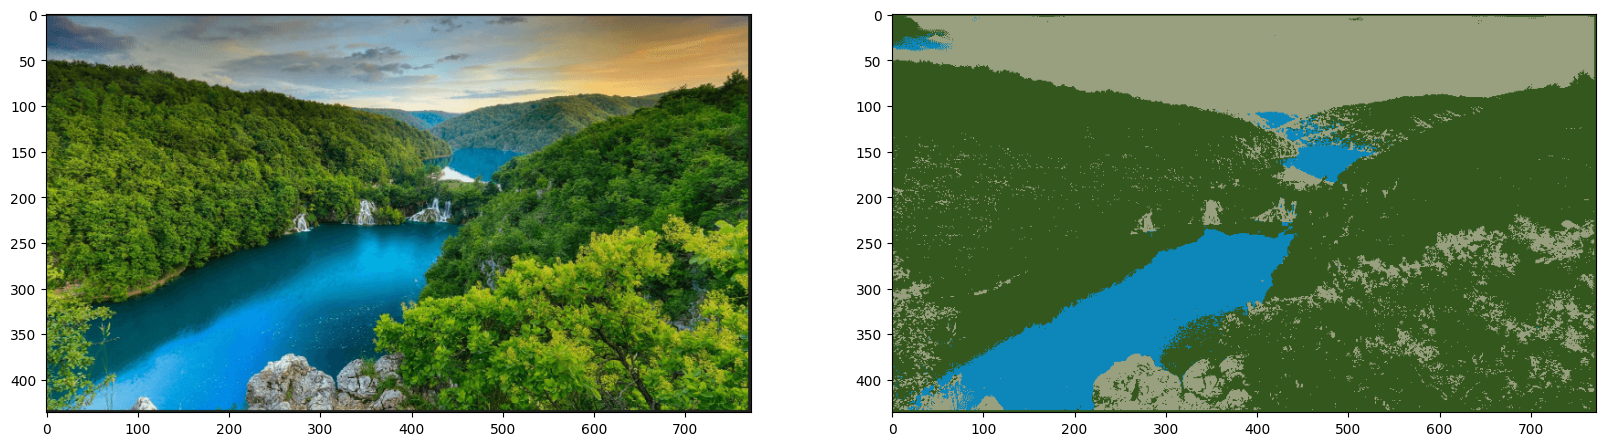

In [20]:
#KMeans Image Segmentation
filename = ('/content/drive/MyDrive/PCVK/jungle.png')
img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
'''
kita akan menggunakan fungsi cv.kmeans() yang meminta array 2D sebagai masu
 kan, sedangkan image aslinya adalah array 3D
selanjutnya kita perlu melakukan flattening array image masukan
'''
#reshape array ke bentuk 2D
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

'''
syarat berhenti iterasi dr KMeans adalah jika centroid sudah tidak terlalu
banyak pergeseran posisi antara interasi sekarang
dengan iterasi sebelumnya (konvergen). Karena jumlah data yang besar, maka
kita akan hentikan iterasi saat jumlah iterasi = 100
atau epsilon(selisih antara posisi centroid skrg dgn posisi centroid di iterasi sebelumnya) < 0.2
'''
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
'''
jika diperhatikan pada image asli, terdapat 3 warna utama (hijau, biru, dan
 putih/orange). untuk percobaan ini kita akan gunakan 3 cluster untuk image ini
'''

k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
#konversi titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)
plt.figure(figsize = (20,20))
plt.subplot(1,2,1),plt.imshow(img)
plt.subplot(1,2,2),plt.imshow(segmented_image)

(<Axes: >, <matplotlib.image.AxesImage at 0x7963de317af0>)

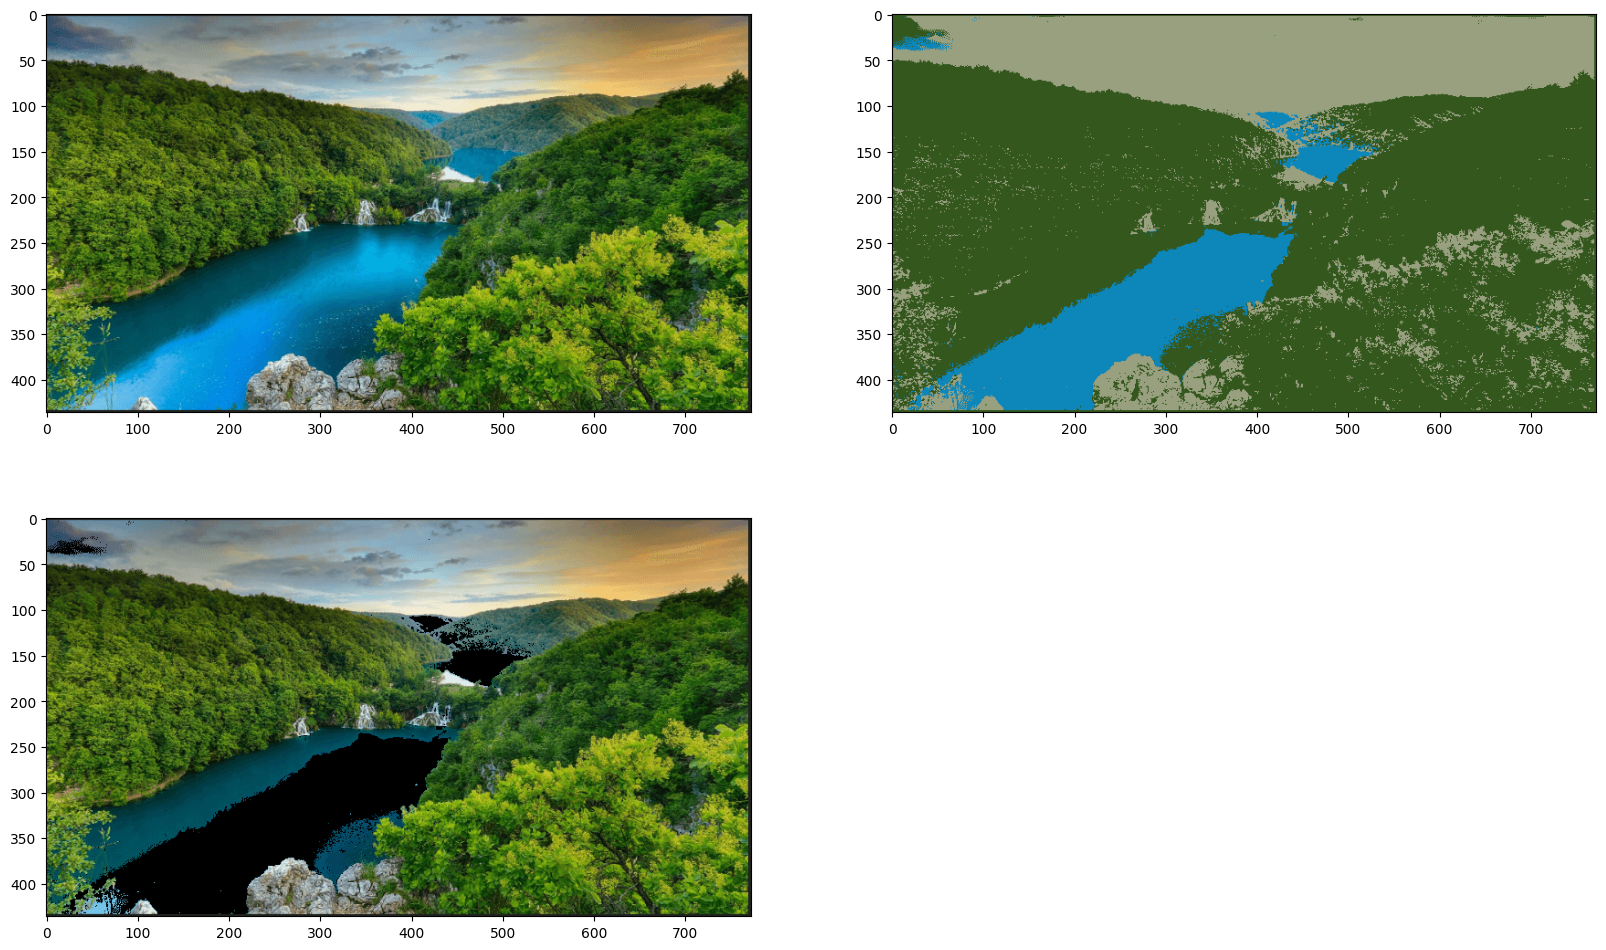

In [21]:
# ubah pixel di cluster 2 menjadi hitam
masked_image = np.copy(img)
# konvert ke bentuk vektor
masked_image = masked_image.reshape((-1, 3))
# cluster yang diubah
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
# konvert ke bentuk asli
masked_image = masked_image.reshape(img.shape)

plt.figure(figsize = (20,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(segmented_image)
plt.subplot(2,2,3),plt.imshow(masked_image)

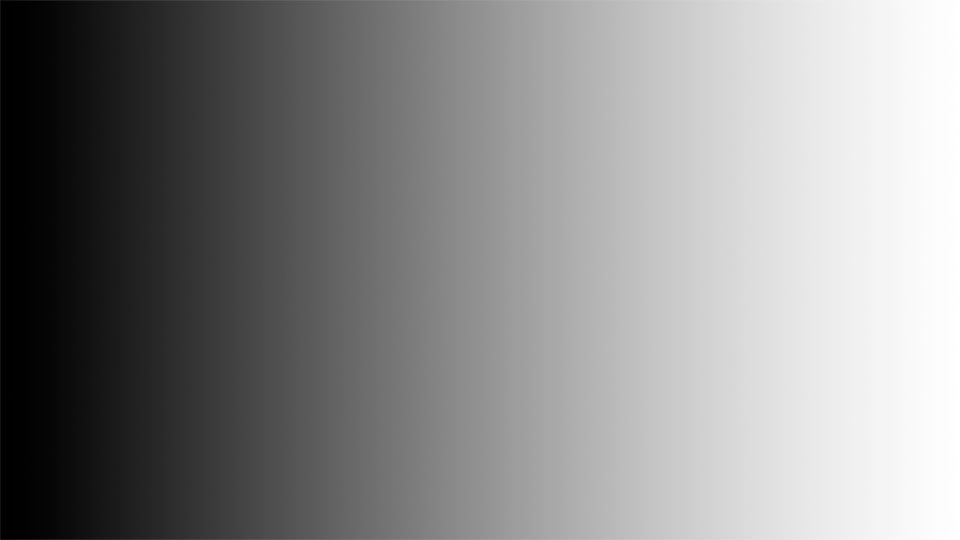

In [22]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# Load the image in grayscale mode for thresholding
filename = '/content/drive/MyDrive/PCVK/gradient.jpg'
img = cv.imread(filename, 0)
cv2_imshow(img)

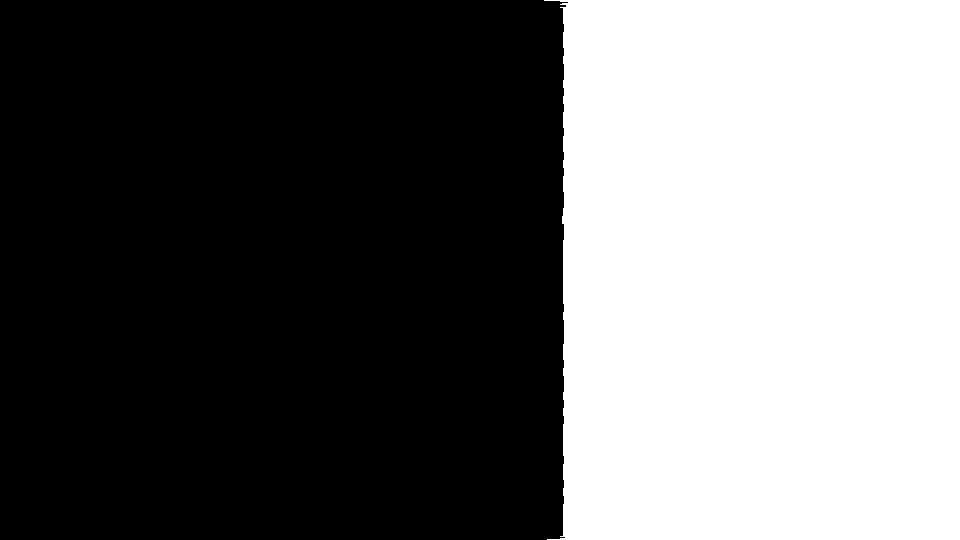

In [23]:
def binary(img,thres):
    img_binary = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] > thres:
                img_binary[i,j] = 255
            else:
                img_binary[i,j] = 0
    return img_binary

img_binary = binary(img,170)
cv2_imshow(img_binary)

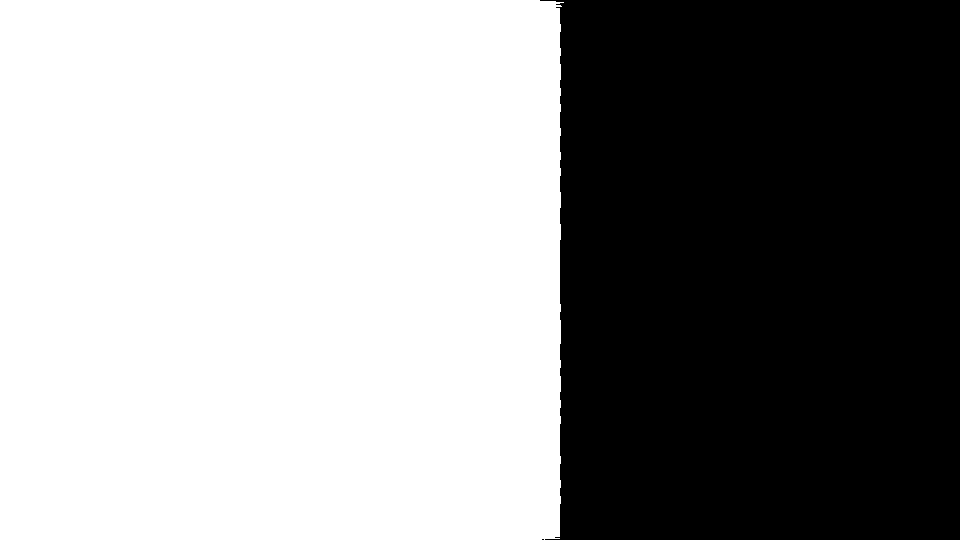

In [24]:
def binaryinv(img,thres):
    img_binaryinv = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] < thres:
                img_binaryinv[i,j] = 255
            else:
                img_binaryinv[i,j] = 0
    return img_binaryinv

img_binary = binaryinv(img,170)
cv2_imshow(img_binary)

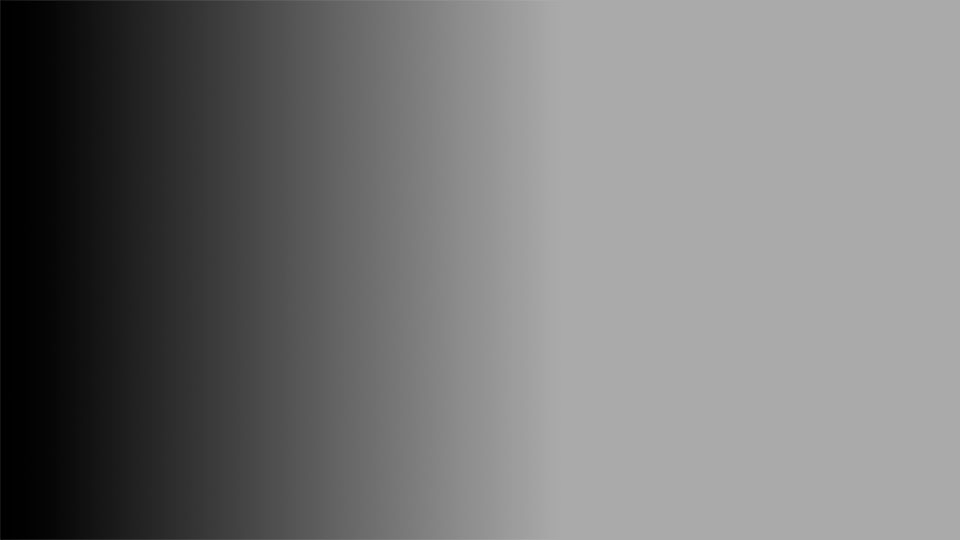

In [25]:
def trunc(img,tresh):
    img_trunc = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] > tresh:
                img_trunc[i,j] = tresh
            else:
                img_trunc[i,j] = img[i,j]
    return img_trunc

img_trunc = trunc(img,170)
cv2_imshow(img_trunc)

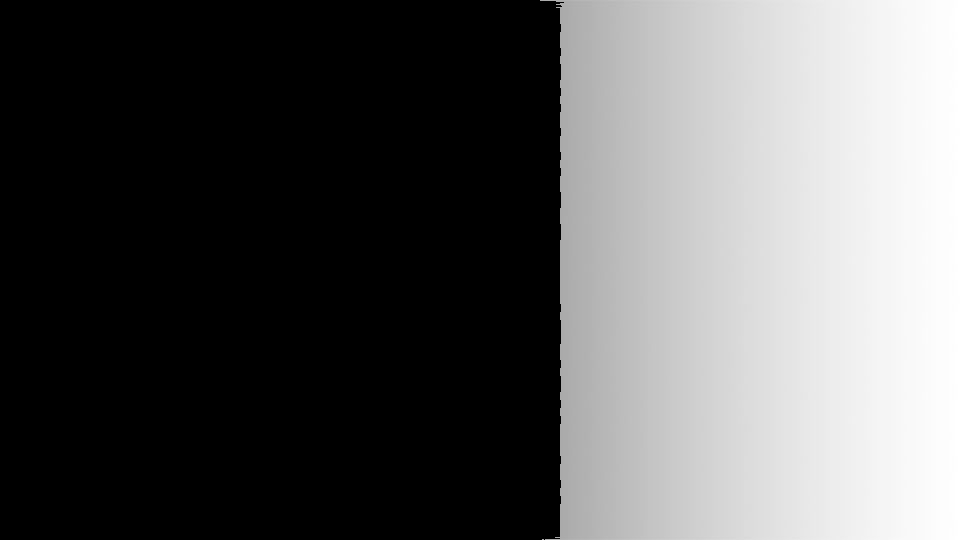

In [26]:
def tozero(img,tresh):
    img_tozero = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] < tresh:
                img_tozero[i,j] = 0
            else:
                img_tozero[i,j] = img[i,j]
    return img_tozero

img_tozero = tozero(img,170)
cv2_imshow(img_tozero)

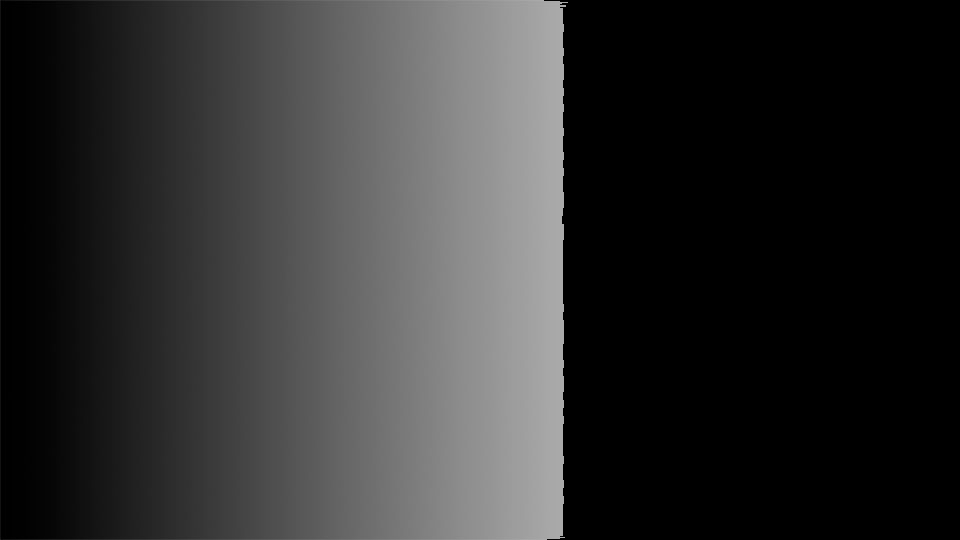

In [27]:
def tozero_inv(img,tresh):
    img_tozero_inv = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] > tresh:
                img_tozero_inv[i,j] = 0
            else:
                img_tozero_inv[i,j] = img[i,j]
    return img_tozero_inv

img_tozero_inv = tozero_inv(img,170)
cv2_imshow(img_tozero_inv)

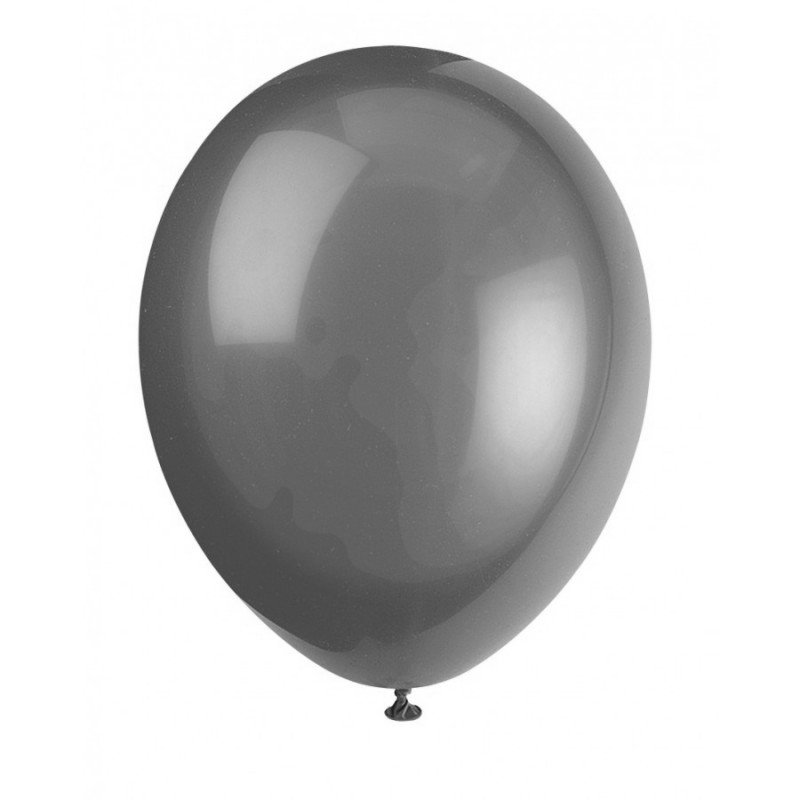

In [28]:
img_balon = cv.imread('/content/drive/MyDrive/PCVK/balloon.jpg',0)
cv2_imshow(img_balon)

In [29]:
def otsu_threshold(image):
    # Menghitung histogram gambar
    histogram, bins = np.histogram(image, bins=256, range=[0, 256])

    # Menghitung probabilitas setiap intensitas piksel
    prob = histogram / np.sum(histogram)

    # Menginisialisasi variabel untuk Otsu Thresholding
    max_variance = 0
    optimal_threshold = 0

    for t in range(256):
        # Probabilitas dua kelas (foreground dan background)
        w0 = np.sum(prob[:t])  # Background
        w1 = np.sum(prob[t:])  # Foreground
        if w0 == 0 or w1 == 0:
            continue
        # Rata-rata dua kelas
        mean0 = np.sum(np.arange(0, t) * prob[:t]) / w0  # Background
        mean1 = np.sum(np.arange(t, 256) * prob[t:]) / w1  # Foreground

        # Variansi antar kelas
        variance_between = w0 * w1 * (mean0 - mean1) ** 2

        # Mencari variansi maksimal
        if variance_between > max_variance:
            max_variance = variance_between
            optimal_threshold = t

    return optimal_threshold

otsu_image = binary(img_balon,otsu_threshold(img_balon))

Text(0.5, 1.0, 'Otsu Thresholding')

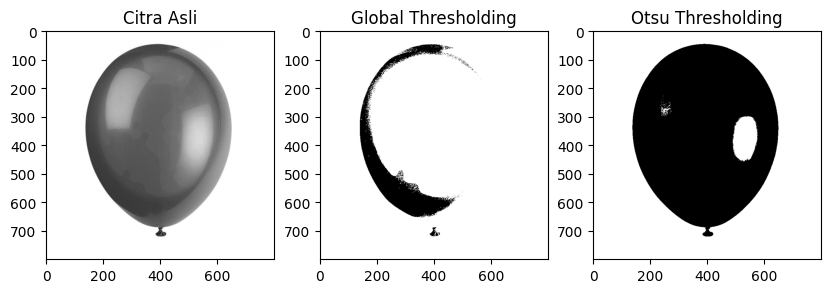

In [30]:
global_tresh = binary(img_balon,90)
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(img_balon,cmap='gray')
plt.title('Citra Asli')
plt.subplot(1,3,2)
plt.imshow(global_tresh,cmap='gray')
plt.title('Global Thresholding')
plt.subplot(1,3,3)
plt.imshow(otsu_image,cmap='gray')
plt.title('Otsu Thresholding')

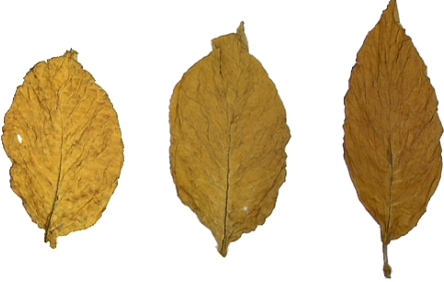

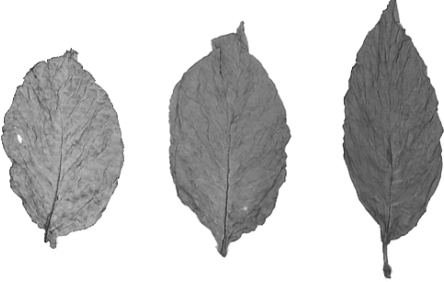

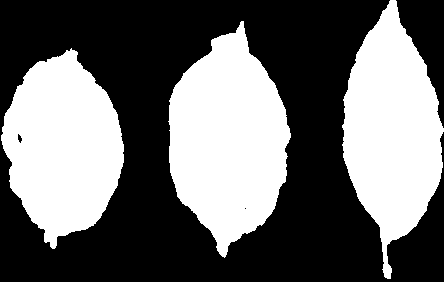

In [31]:
img_tbc_ori = cv.imread('/content/drive/MyDrive/PCVK/tobacco.jpg')
img_tbc_gray = cv.cvtColor(img_tbc_ori,cv.COLOR_BGR2GRAY)
cv2_imshow(img_tbc_ori)
cv2_imshow(img_tbc_gray)
_, img_mask = cv.threshold(img_tbc_gray,200,255,cv.THRESH_BINARY_INV)
cv2_imshow(img_mask)

In [32]:
print(img_mask.shape)
print(img_tbc_gray.shape)

(282, 444)
(282, 444)


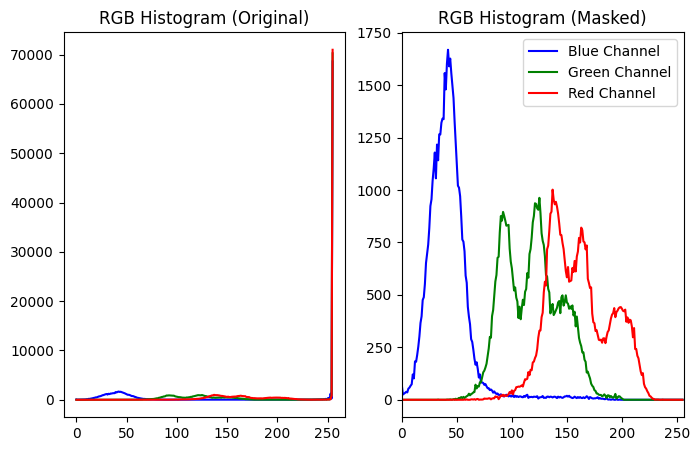

In [33]:
# Pisahkan gambar menjadi channel B, G, R
b, g, r = cv.split(img_tbc_ori)
# Hitung histogram Ori
hist_ori_b = cv.calcHist([b], [0], None, [256], [0, 256])
hist_ori_g = cv.calcHist([g], [0], None, [256], [0, 256])
hist_ori_r = cv.calcHist([r], [0], None, [256], [0, 256])
# Hitung histogram untuk setiap channel dengan menggunakan mask
hist_b = cv.calcHist([b], [0], img_mask, [256], [0, 256])
hist_g = cv.calcHist([g], [0], img_mask, [256], [0, 256])
hist_r = cv.calcHist([r], [0], img_mask, [256], [0, 256])

plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.title("RGB Histogram (Original)")
plt.plot(hist_ori_b, color='b', label='Blue Channel')   # Histogram channel Biru
plt.plot(hist_ori_g, color='g', label='Green Channel')  # Histogram channel Hijau
plt.plot(hist_ori_r, color='r', label='Red Channel')    # Histogram channel Merah

plt.subplot(1,2,2)
plt.title("RGB Histogram (Masked)")
plt.plot(hist_b, color='b', label='Blue Channel')   # Histogram channel Biru
plt.plot(hist_g, color='g', label='Green Channel')  # Histogram channel Hijau
plt.plot(hist_r, color='r', label='Red Channel')    # Histogram channel Merah

# t batas sumbu x dari 0 sampai 256
plt.xlim([0, 256])
# Tambahkan legend agar kita bisa melihat channel mana yang mana
plt.legend()
# Tampilkan plot
plt.show()

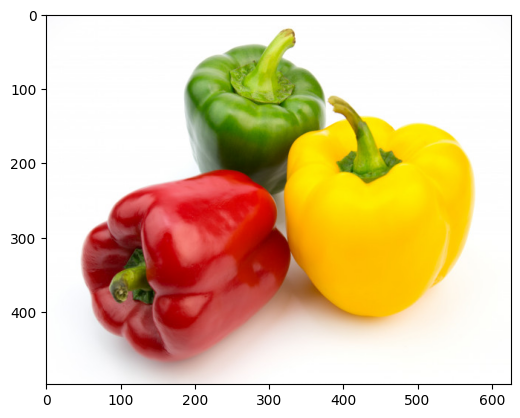

In [34]:
img_pepper = cv.imread('/content/drive/MyDrive/PCVK/peppers.jpg')
img_pepper = cv.cvtColor(img_pepper,cv.COLOR_BGR2RGB)
plt.imshow(img_pepper)

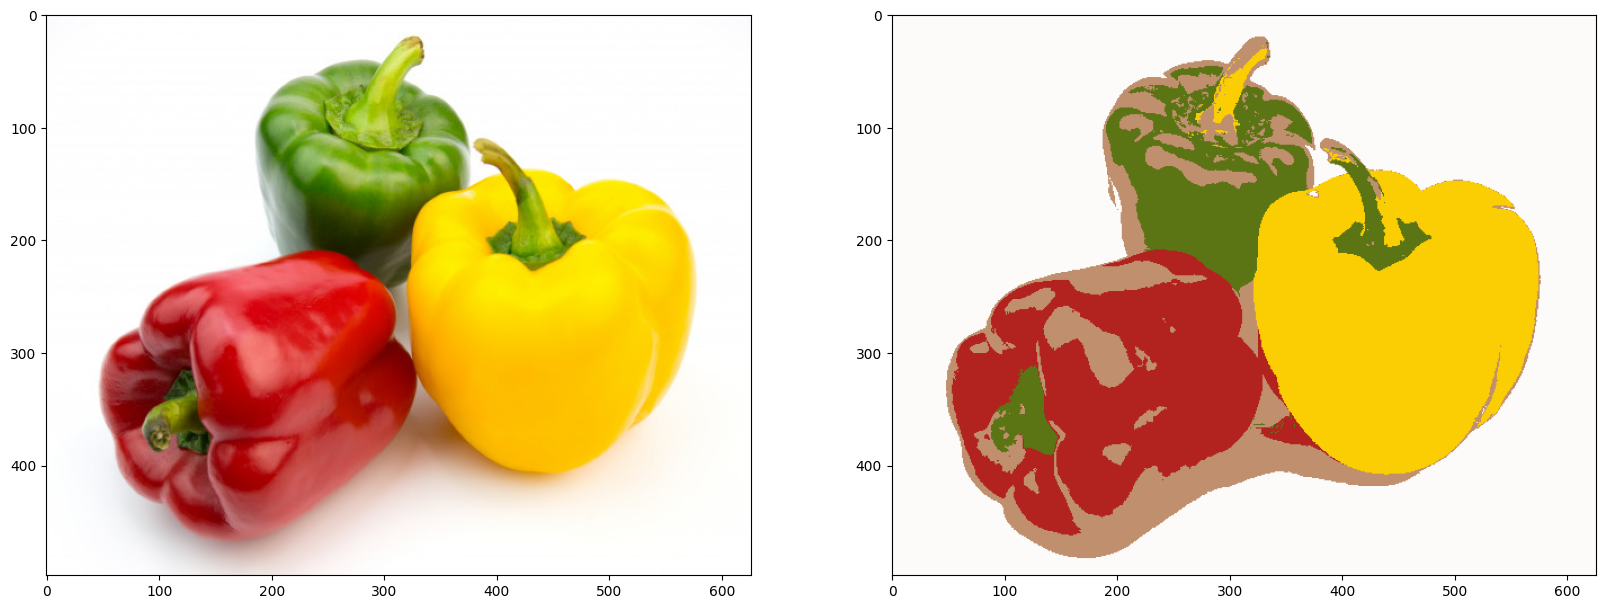

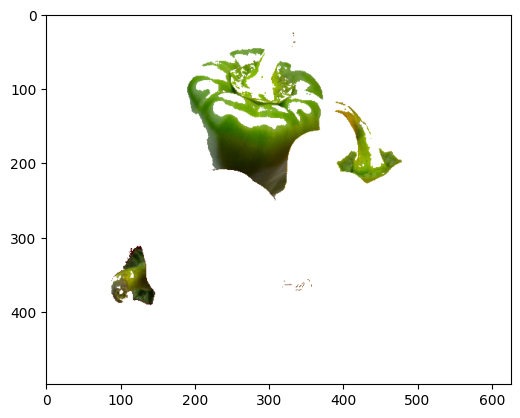

In [35]:
from sklearn.cluster import KMeans
#reshape array ke bentuk 2D
pixel_values = img_pepper.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 5
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
#konversi titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img_pepper.shape)

masked_image = np.copy(img_pepper)
# konvert ke bentuk vektor
masked_image = masked_image.reshape((-1, 3))
# cluster yang diubah
masked_image[labels == 4] = [255,255,255]
masked_image[labels == 2] = [255,255,255]
masked_image[labels == 3] = [255,255,255]
masked_image[labels == 1] = [255,255,255]
# konvert ke bentuk asli
masked_image = masked_image.reshape(img_pepper.shape)

plt.figure(figsize = (20,12))
plt.subplot(1,2,1),plt.imshow(img_pepper)
plt.subplot(1,2,2),plt.imshow(segmented_image)
plt.show()
plt.imshow(masked_image)

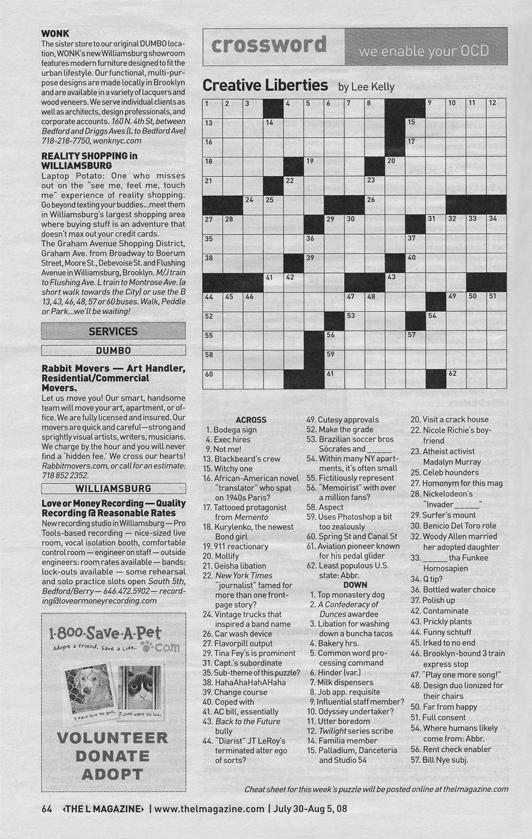

In [36]:
img_crossword = cv.imread('/content/drive/MyDrive/PCVK/crossword.jpg',0)
cv2_imshow(img_crossword)

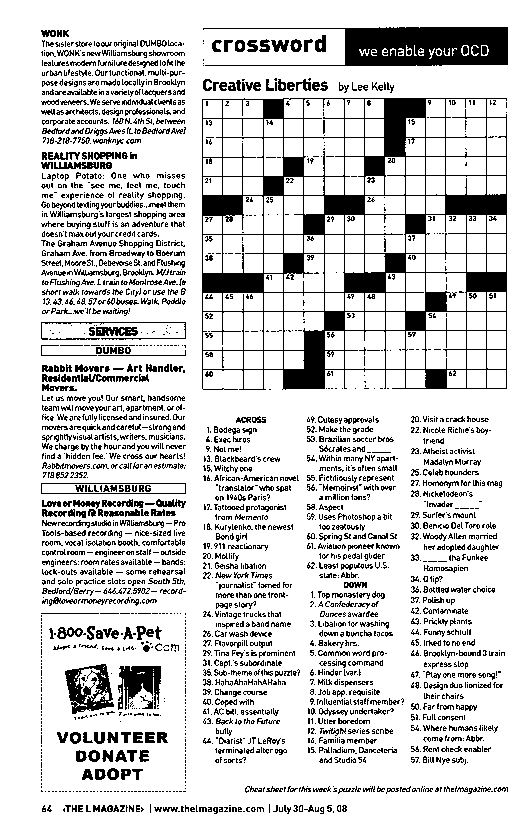

In [37]:
res,thres = cv.threshold(img_crossword,127,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
cv2_imshow(thres)